# Quantitative Analysis on Stock Data

**Quantitative analysis** is a data-driven approach to studying the stock market. It uses mathematical and statistical techniques to extract insights from financial data, like the one we have, to inform investment decisions.  

In essence, it's about using numbers to understand market trends, assess risk, and build a solid investment strategy.


## Stock Market Dataset for Quantitative Analysis

This dataset provides a valuable resource for quantitative analysis of stock market behavior. It includes the following data points for each stock:

* **Ticker:** Unique symbol identifying the stock.
* **Date:** Specific date of the trade.
* **Open:** Opening price of the stock on that day.
* **High:** Highest price reached by the stock during the day.
* **Low:** Lowest price reached by the stock during the day.
* **Close:** Closing price of the stock at the end of the day.
* **Adj Close:** Adjusted closing price considering corporate actions like stock splits.
* **Volume:** Total number of shares traded for the stock on that day.

This data facilitates in-depth analysis with the following objectives:

* **Trend Analysis:** Identify long-term trends in stock prices and overall market movements.
* **Volatility Assessment:** Evaluate the stability and risk associated with different stocks based on their price fluctuations.
* **Correlation Study:** Investigate the relationships between different stocks, understand market segments, and discover diversification opportunities.
* **Risk-Return Trade-off Analysis:** Analyze the balance between potential risks and rewards of various stocks to aid in portfolio management decisions.

Link to dataset: https://statso.io/quantitative-analysis-case-study/

### Importing required libraries

In [346]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

### Importing the Stock Dataset

In [347]:
# Importing the stocks data
stock_data = pd.read_csv("1_stocks.csv")

In [348]:
# Displaying the first five rows of the dataset
stock_data.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [349]:
# Checking for null values in the data
null_values = stock_data.isnull().sum()
null_values

Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [350]:
# Checking for duplicate values in the data
duplicate_values = stock_data.duplicated().sum()
duplicate_values

0

## Exploratory Data Analysis (EDA)
1. Summary Statistics
2. Visulaize Data Distributions

### Observation based upon the Summary Statistics of Closing Prices.
- The dataset includes data for four stocks: AAPL, GOOG, MSFT, and NFLX.

- **Count:** The number of data points (closing prices) available for each stock which is 62.0

- **Mean:** Indicates the average closing price over the period.
  - NFLX has the highest mean price, suggesting it is the most expensive stock on average, while GOOG has the lowest.

- **Standard Deviation:** Measures the volatility of the stock prices.
  - NFLX exhibits the highest volatility, followed by MSFT, indicating these stocks have more significant price fluctuations.
  - GOOG shows the least volatility among the four.

- **Min and Max Prices:** Range b/w minimum and maximum price provides the overview of overall price movement.
  - NFLX has the widest range, reflecting its higher volatility.
  - GOOG has the narrowest range, indicating relatively stable price movements.

- **Percentiles:** Provides insights into distribution of stock prices.
  - For instance, APL's closing prices are below $158.06, and 50% are above.
  - The 25th and 75th percentiles show the spread of the middle 50% of the data.



1. Summary Statistics

In [351]:
# Summary Statistics
summary_statistics = stock_data.describe()
summary_statistics

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,215.252093,217.919662,212.697452,215.381674,215.362697,3.208210e+07
std,91.691315,92.863023,90.147881,91.461989,91.454750,2.233590e+07
min,89.540001,90.129997,88.860001,89.349998,89.349998,2.657900e+06
25%,135.235004,137.440004,134.822495,136.347498,136.347498,1.714180e+07
50%,208.764999,212.614998,208.184998,209.920006,209.920006,2.734000e+07
75%,304.177505,307.565002,295.437500,303.942505,303.942505,4.771772e+07
max,372.410004,373.829987,361.739990,366.829987,366.829987,1.133164e+08


In [352]:
# Group the summary statistics by 'Ticker' for the 'Close' price column
stock_data.groupby('Ticker')['Close'].describe()

,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
AAPL,62.0,158.240645,7.360485,145.309998,152.077499,158.055000,165.162506,173.570007
GOOG,62.0,100.631532,6.279464,89.349998,94.702501,102.759998,105.962503,109.459999
MSFT,62.0,275.039839,17.676231,246.270004,258.742500,275.810013,287.217506,310.649994
NFLX,62.0,327.614677,18.554419,292.760010,315.672493,325.600006,338.899994,366.829987


#### Why did we group by stocks for closing prices?
- It reflects the final consensus on the stock's value for the trading day.
- Trend analysis, moving averages, and technical indicators, rely on the closing prices
- Provides more stable basis for analysis.

2. Visualizing Data Distributions

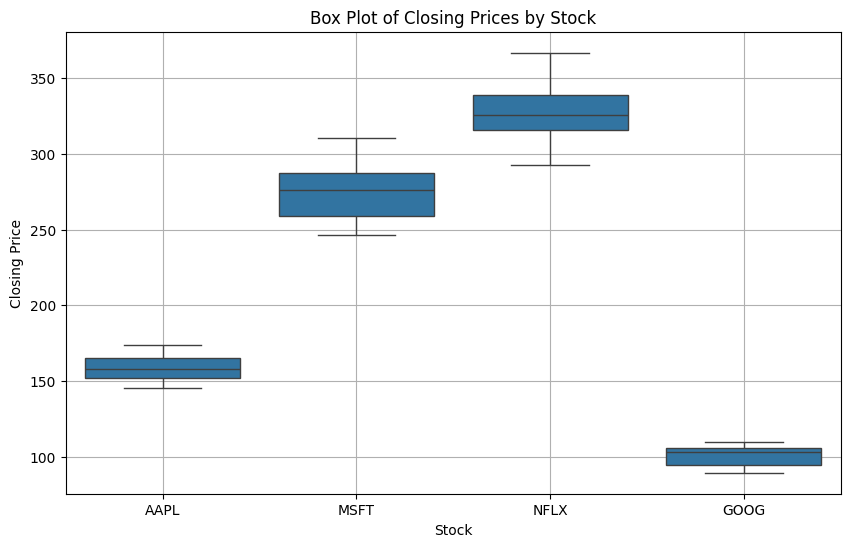

In [353]:
# Plotting box plots for the closing prices of each stock
plt.figure(figsize=(10, 6))

# Plotting the box plots for each stock
sns.boxplot(x='Ticker', y='Close', data=stock_data)
plt.title('Box Plot of Closing Prices by Stock')
plt.xlabel('Stock')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

### Observations made from the Box-Plots
- Price Levels:

  - NFLX is the most expensive stock based on its median closing price.
  - GOOG is the least expensive stock based on its median closing price.

- Volatility:

  - NFLX exhibits the highest volatility, indicated by its wide interquartile range (IQR).
  - MSFT shows moderate volatility with a broader price range compared to AAPL and GOOG.
  - AAPL and GOOG have lower volatility, as evidenced by their narrow IQRs.

- Stability:

  - GOOG and AAPL are more stable stocks due to their narrow price ranges and lower volatility.
  - NFLX and MSFT are less stable, given their wider price ranges and higher volatility.







# Time series Analysis
Plot time series to observe trends over time.

In [354]:
# Plot time series to observe trends over time of each stock.
# create a copy for avoid modifying original data
new_stock = stock_data.copy()
new_stock['Date'] = pd.to_datetime(new_stock['Date'])  # Convert 'Date' column to datetime format

# pivot the data to create new dataframe
pivot_data = new_stock.pivot(index='Date', columns='Ticker', values='Close')

# create an interactive plot with plotly
fig = go.Figure()

# Add a trace for each ticker
for ticker in pivot_data.columns:
    fig.add_trace(go.Scatter(x=pivot_data.index, y=pivot_data[ticker], name=ticker))

# Update layout for better readability
fig.update_layout(title='Time Series of Closing Prices for Each Stock',
                  xaxis_title='Date',
                  yaxis_title='Closing Price',
                  legend_title='Ticker',
                  hovermode='x unified',
                  template='plotly_white')

# Show the plot
fig.show()

### Observations based upon the time-series plot
- APPL, GOOG, MSFT show general upward trend over the period.
- NFLX displays more volatility and a slight downward trend overall.
- If we look closely, we can see that all stocks show a dip around late February/early March, suggesting that some event affected the stocks.
- GOOG is the most stable stock of all.
- NFLX and MSFT trade at higher price when compared to GOOG and APPL stocks.

# Volatility Assessment

In [355]:
volatility = stock_data.groupby('Ticker')['Close'].std().sort_values(ascending=False)
volatility

Ticker
NFLX    18.554419
MSFT    17.676231
AAPL     7.360485
GOOG     6.279464
Name: Close, dtype: float64

In [356]:
fig = px.bar(volatility,
             x=volatility.index,
             y=volatility.values,
             labels={'y': 'Standard Deviation', 'x': 'Ticker'},
             title='Volatility of Closing Prices (Standard Deviation)')
fig.show()

### Observations based upon volatility (standard deviation)
- NFLX has the highest volatility with a standard deviation about 18.55.
- MSFT also has high volatility, although less than NFLX, with standard deviation about 17.68.
- APPL and GOOG have comparatively less volatility with standard deviation of 7.36 and 6.28 respectively.

# Correlation Study

In [357]:
correlation_matrix = pivot_data.corr()

fig = go.Figure(data=[go.Heatmap(z=correlation_matrix.values,
                               x=correlation_matrix.columns,
                               y=correlation_matrix.index,
                               colorscale='reds')])

fig.update_layout(title='Correlation Matrix of Closing Prices',
                  xaxis_title='Stocks',
                  yaxis_title='Stocks',
                  template='plotly_white')

fig.show()

### Observations based upon the Correlation Matrix
- AAPL, GOOG, and MSFT show very strong positive correlations with each other (all above 0.88).
- The strongest correlation is between AAPL and MSFT at 0.953037, indicating their prices move very similarly.
- GOOG is also highly correlated with both AAPL (0.901662) and MSFT (0.884527).
- NFLX shows weak positive correlations with the other three stocks (all below 0.21).

In [358]:
correlation_matrix

Ticker,AAPL,GOOG,MSFT,NFLX
Ticker,,,,
AAPL,1.000000,0.901662,0.953037,0.154418
GOOG,0.901662,1.000000,0.884527,0.201046
MSFT,0.953037,0.884527,1.000000,0.191273
NFLX,0.154418,0.201046,0.191273,1.000000


# Comparative Analysis

In [359]:
# Calculate the percentage change from the first to the last day
percentage_change = ((pivot_data.iloc[-1] - pivot_data.iloc[0]) / pivot_data.iloc[0]) * 100


In [360]:
percentage_change

Ticker
AAPL    12.234086
GOOG    -1.689193
MSFT    16.104798
NFLX   -11.073151
dtype: float64

In [361]:
# Convert to DataFrame for Plotly
percentage_change_df = percentage_change.reset_index()
percentage_change_df.columns = ['Ticker', 'Percentage Change']

In [362]:
# Create an interactive bar chart using Plotly
fig = px.bar(percentage_change_df,
             x='Ticker',
             y='Percentage Change',
             title='Percentage Change in Closing Prices',
             labels={'Percentage Change': 'Percentage Change (%)', 'Ticker': 'Ticker'},
             text='Percentage Change')

# Customize the layout
fig.update_layout(template='plotly_white')  # Use 'plotly_white' template

# Customize text display
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

# Show the interactive plot
fig.show()


### Observations made based upon the Comparative analysis
- MSFT and APPL are the top performers with significant gains of 16.10% and 12.23% respectively.
- GOOG shows slight decline of -1.69%, suggesting relatively stable performance but potential risks. Also indicate slight decline in prices over observed period.
- NFLX is the clear underperformer with substantial drop of -11.07%. It suggests the significant decline in its stock price over observed period.

# Risk-Return Trade-off Analysis

In [363]:
# Calculate daily returns
daily_returns = pivot_data.pct_change().dropna()

In [364]:
# Calculate average daily return and risk (standard deviation)
average_daily_return = daily_returns.mean()
risk = daily_returns.std()

In [365]:
# Create a DataFrame for Plotting
risk_return_df = pd.DataFrame({
    'Ticker': average_daily_return.index,
    'Risk (Std Dev)': risk.values,
    'Average Return': average_daily_return.values
})

In [366]:
risk_return_df

,Ticker,Risk (Std Dev),Average Return
0,AAPL,0.014152,0.001991
1,GOOG,0.020710,-0.000067
2,MSFT,0.017881,0.002606
3,NFLX,0.022481,-0.001676


In [367]:
# Create a scatter plot for the risk-return profile
fig = px.scatter(risk_return_df,
             x='Risk (Std Dev)',
             y='Average Return',
             text='Ticker',
                 title='Risk-Return Profile',
                 labels={'Risk (Std Dev)': 'Risk (Standard Deviation)', 'Average Return': 'Average Daily Return'},
                 template='plotly_white')

# Update layout for better readability
fig.update_traces(marker=dict(size=10),
                  textposition='top center')


# Show the plot
fig.show()


### Observations based upon Risk-Return Trade-off Analysis
- MSFT (Microsoft) offers the highest average daily return with moderate risk, making it an attractive option for balanced growth.

- AAPL (Apple) shows a good balance of relatively low risk and positive returns, suitable for more conservative investors.

- GOOG (Google/Alphabet) has higher risk than AAPL and MSFT, with near-zero average daily returns.

- NFLX (Netflix) presents the highest risk and negative average daily returns, suggesting it may be the least favorable investment in this group.

# Overall Summary
 **Based on the analysis, we observed that MSFT and AAPL emerge as the top performers with significant gains, demonstrating strong upward trends and relatively stable price movements. MSFT, in particular, offers the highest average daily return with moderate risk, making it an attractive option for balanced growth. AAPL also shows a good balance of relatively low risk and positive returns, suitable for conservative investors. In contrast, NFLX exhibits the highest volatility and a substantial decline in stock price, indicating high risk and potential instability. GOOG, while showing slight declines, remains the most stable stock with the least volatility but offers near-zero average daily returns. Therefore, MSFT and AAPL are the most favorable investments due to their positive returns, stability, and balanced risk-return profiles, making them suitable for both growth-oriented and conservative investment strategies.**